# Assignment 2 - K-Means & DBSCAN Clustering
## Question 1
1. Retrieve and load the Olivetti faces dataset

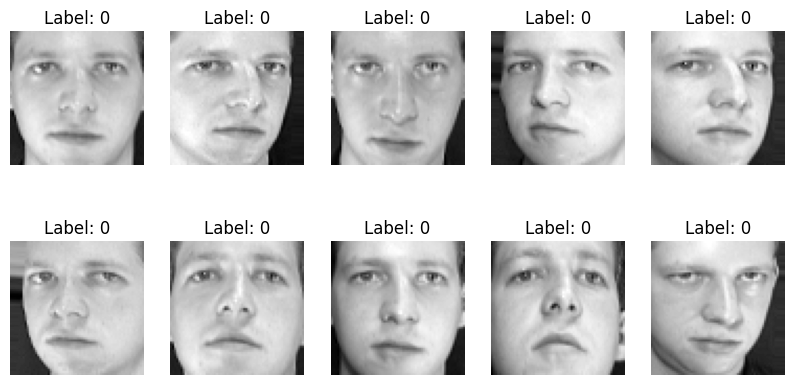

In [4]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt


# Fetch the Olivetti faces dataset
data = fetch_olivetti_faces()
X, y = data['images'], data['target']

# Display some images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i], cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')

plt.show()

2. Split the training set, a validation set, and a test set using stratified sampling to ensure that there are the same number of images per person in each set. Provide your rationale for the split ratio

In [5]:
from sklearn.model_selection import train_test_split

# Flatten the images to 1d for the split by reshaping the dataset
X = X.reshape((X.shape[0], -1)) 

# Stratitidied split of 60% training, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=45)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=45)

# Check the shapes of the resulting sets
print("Training size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:", X_test.shape[0])

Training size: 240
Validation size: 80
Test size: 80


3. Using k-fold cross validation, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set.

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Pipeline that scales the data and applies the SVC
svc = make_pipeline(StandardScaler(), SVC())

# Apply k-fold cross-validation (5 validation folds) on training set
cv_scores = cross_val_score(svc, X_train, y_train, cv=5)

# Train classifier on the full training set
svc.fit(X_train, y_train)

# Evaluate on the validation set
val_score = svc.score(X_val, y_val)

# Predict person for the validation set
y_val_pred = svc.predict(X_val)

# Print the predicted and actual person IDs for the first few images
for i in range(10):
    print(f"Image {i+1}: Predicted Person ID = {y_val_pred[i]}, Actual Person ID = {y_val[i]}")

# Output cross-validation and validation scores
print("\nCross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Validation set score:", val_score)

Image 1: Predicted Person ID = 34, Actual Person ID = 34
Image 2: Predicted Person ID = 25, Actual Person ID = 25
Image 3: Predicted Person ID = 10, Actual Person ID = 10
Image 4: Predicted Person ID = 31, Actual Person ID = 31
Image 5: Predicted Person ID = 37, Actual Person ID = 37
Image 6: Predicted Person ID = 7, Actual Person ID = 7
Image 7: Predicted Person ID = 24, Actual Person ID = 24
Image 8: Predicted Person ID = 8, Actual Person ID = 8
Image 9: Predicted Person ID = 15, Actual Person ID = 15
Image 10: Predicted Person ID = 34, Actual Person ID = 34

Cross-validation scores: [0.77083333 0.8125     0.8125     0.8125     0.85416667]
Mean cross-validation score: 0.8125
Validation set score: 0.9


4. Use K-Means to reduce the dimensionality of the set. Provide your rationale for the similarity measure used to perform the clustering. Use the silhouette score approach to choose the number of clusters

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Search for the optimal # of clusters using silhouette score
best_score = -1
best_n_clusters = 0

for n_clusters in range(2, 50):  # Extended range for cluster search
    kmeans = KMeans(n_clusters=n_clusters, random_state=45, n_init=10) # 10 random initializations
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)

    # Check if this score is the best one found
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters

print(f"Best number of clusters based on silhouette score: {best_n_clusters}")

# Reduce dimensionality using K-Means with the best number of clusters
kmeans = KMeans(n_clusters=best_n_clusters, random_state=45, n_init=10)
X_train_reduced = kmeans.fit_transform(X_train)
X_val_reduced = kmeans.transform(X_val)

print(f"Reduced dimensionality of X_train: {X_train_reduced.shape}")
print(f"Reduced dimensionality of X_val: {X_val_reduced.shape}")


c:\Users\gcast\anaconda3\envs\tf_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gcast\anaconda3\envs\tf_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gcast\anaconda3\envs\tf_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gcast\anaconda3\envs\tf_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

Best number of clusters based on silhouette score: 48


c:\Users\gcast\anaconda3\envs\tf_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Reduced dimensionality of X_train: (240, 48)
Reduced dimensionality of X_val: (80, 48)


5. Use the set from step (4) to train a classifier as in step (3)

In [8]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# SVM classifier
svc = make_pipeline(StandardScaler(), SVC(random_state=45))

# Train classifier on the reduced training set
svc.fit(X_train_reduced, y_train)

# Evaluate the reduced validation set
val_score = svc.score(X_val_reduced, y_val)

# Predict the person ID for the validation set
y_val_pred = svc.predict(X_val_reduced)

# Print the predicted and actual person IDs for the first few images
for i in range(10):
    print(f"Image {i+1}: Predicted Person ID = {y_val_pred[i]}, Actual Person ID = {y_val[i]}")

# Output classification metrics
print("\nValidation set score:", val_score)
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

Image 1: Predicted Person ID = 37, Actual Person ID = 34
Image 2: Predicted Person ID = 25, Actual Person ID = 25
Image 3: Predicted Person ID = 10, Actual Person ID = 10
Image 4: Predicted Person ID = 31, Actual Person ID = 31
Image 5: Predicted Person ID = 37, Actual Person ID = 37
Image 6: Predicted Person ID = 7, Actual Person ID = 7
Image 7: Predicted Person ID = 24, Actual Person ID = 24
Image 8: Predicted Person ID = 22, Actual Person ID = 8
Image 9: Predicted Person ID = 23, Actual Person ID = 15
Image 10: Predicted Person ID = 34, Actual Person ID = 34

Validation set score: 0.6375

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       1.00      0.50      0.67         

c:\Users\gcast\anaconda3\envs\tf_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gcast\anaconda3\envs\tf_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gcast\anaconda3\envs\tf_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


6. Apply DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm to the Olivetti Faces dataset for clustering. Preprocess the images and convert them into feature vectors, then use DBSCAN to group similar images together based on their density. Provide your rationale for the similarity measure used to perform the clustering, considering the nature of facial image data.

In [9]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import DBSCAN
import numpy as np

# Fetch the Olivetti Faces dataset
data = fetch_olivetti_faces()
X = data.data  # feature vectors

# Normalize the feature vectors
X_normalized = StandardScaler().fit_transform(X)

# DBSCAN parameters
epsilon = 0.3  # Max distance between 2 samples for it to be in the same neighborhood
min_samples = 5  # Min # of samples in neighborhood for point to be a core point

# Create DBSCAN model
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Fit model to the normalized feature vectors
dbscan.fit(X_normalized)

# Get cluster labels
labels = dbscan.labels_

# Identify number of clusters and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise (-1)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")


Estimated number of clusters: 0
Number of noise points: 400
